In [1]:
# import libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

In [5]:
# data does not have headers
columns = [
    'Age', 
    'Delivary_Nbr',
    'Delivary_Time',
    'Blood_Pressure',
    'Heart_Problem',
    'Caesarian'
    ]

df = pd.read_csv(
    '../datasets/caesarian.csv.arff',
    names=columns,
    index_col=None,
    skiprows=15
    )
df.head(10)

,Age,Delivary_Nbr,Delivary_Time,Blood_Pressure,Heart_Problem,Caesarian
0,22,1,0,2,0,0
1,26,2,0,1,0,1
2,26,2,1,1,0,0
3,28,1,0,2,0,0
4,22,2,0,1,0,1
5,26,1,1,0,0,0
6,27,2,0,1,0,0
7,32,3,0,1,0,1
8,28,2,0,1,0,0
9,27,1,1,1,0,1


In [8]:
df.shape

(80, 6)

In [6]:
# target column is Caesarian
features = df.drop('Caesarian', axis=1).values
labels = df[['Caesarian']].values

In [9]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=0)

In [11]:
model = LogisticRegression()
model.fit(X_train, y_train)

D:\anaconda3\envs\ml\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [12]:
y_proba = model.predict_proba(X_test)

In [13]:
y_proba

array([[0.22083119, 0.77916881],
       [0.52374461, 0.47625539],
       [0.44452429, 0.55547571],
       [0.55519917, 0.44480083],
       [0.13433589, 0.86566411],
       [0.32614894, 0.67385106],
       [0.31729589, 0.68270411],
       [0.44452429, 0.55547571],
       [0.55005086, 0.44994914],
       [0.48310668, 0.51689332],
       [0.32085037, 0.67914963],
       [0.19657847, 0.80342153],
       [0.48008433, 0.51991567],
       [0.41488163, 0.58511837],
       [0.52201274, 0.47798726],
       [0.55005086, 0.44994914]])

In [14]:
_fpr, _tpr, _thresholds = roc_curve(y_test, y_proba[:, 0])

In [15]:
print(_fpr)

[0.    0.    0.125 0.625 0.75  0.875 0.875 1.    1.   ]


In [16]:
print(_tpr)

[0.    0.125 0.25  0.25  0.375 0.375 0.75  0.75  1.   ]


In [17]:
print(_thresholds)

[1.55519917 0.55519917 0.55005086 0.48008433 0.44452429 0.41488163
 0.31729589 0.22083119 0.13433589]


Plotting the ROC curve

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

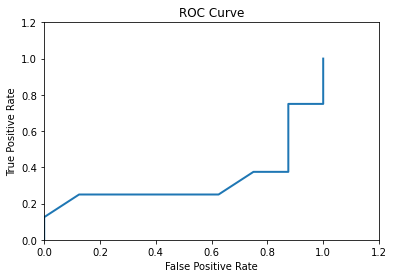

In [19]:
plt.plot(_fpr, _tpr, lw=2, label='ROC curve')

plt.xlim(0.0, 1.2)
plt.ylim(0.0, 1.2)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC Curve')

plt.show()

ROC AUC is the area under the ROC curve. It is a measure of the performance of a classifier.

Plot the ROC curve for the model.

In [21]:
from sklearn.metrics import roc_auc_score

_auc = roc_auc_score(y_test, y_proba[:, 0])
print(_auc)

0.328125
